# X vs T Scatter Plot
## Visualization of 7203.txt Data

This notebook visualizes data from `nikkei225_data/gnminer_individual/7203.txt`,
displaying continuous value X on the vertical axis and time variable T on the horizontal axis.

In [ ]:
# ============================================================================
# Import Libraries
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Figure default size settings
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully")

Libraries imported successfully


In [4]:
# ============================================================================
# Load Data
# ============================================================================

# Data file path
data_file = '/Users/suzukiyasuhiro/Desktop/study/ts-itemsbs/forex_data/gnminer_individual/USDJPY.txt'

print("=" * 80)
print(f"Loading data file: {data_file}")
print("=" * 80)

print(data_file)

# Read CSV file
df = pd.read_csv(data_file)

# Extract X and T columns
X = df['X'].values
T = pd.to_datetime(df['T'])

# Display basic information
print(f"\n✓ Data loaded successfully")
print(f"  Records: {len(df):,}")
print(f"  X range: {X.min():.2f} ~ {X.max():.2f}")
print(f"  Period: {T.min().date()} ~ {T.max().date()}")
print(f"  \nX statistics:")
print(f"    Mean: {X.mean():.2f}")
print(f"    Std Dev: {X.std():.2f}")
print(f"    Median: {np.median(X):.2f}")

# Display data preview
print(f"\nData preview:")
df[['T', 'X']].head(10)

Loading data file: /Users/suzukiyasuhiro/Desktop/study/ts-itemsbs/forex_data/gnminer_individual/USDJPY.txt
/Users/suzukiyasuhiro/Desktop/study/ts-itemsbs/forex_data/gnminer_individual/USDJPY.txt

✓ Data loaded successfully
  Records: 4,120
  X range: -3.72 ~ 3.82
  Period: 2010-01-01 ~ 2025-10-20
  
X statistics:
    Mean: 0.01
    Std Dev: 0.58
    Median: 0.02

Data preview:


,T,X
0,2010-01-01,-0.457378
1,2010-01-04,-0.983841
2,2010-01-05,0.841845
3,2010-01-06,1.119577
4,2010-01-07,-0.781664
5,2010-01-08,-0.612995
6,2010-01-11,-1.098902
7,2010-01-12,0.387568
8,2010-01-13,-0.181554
9,2010-01-14,-0.566468


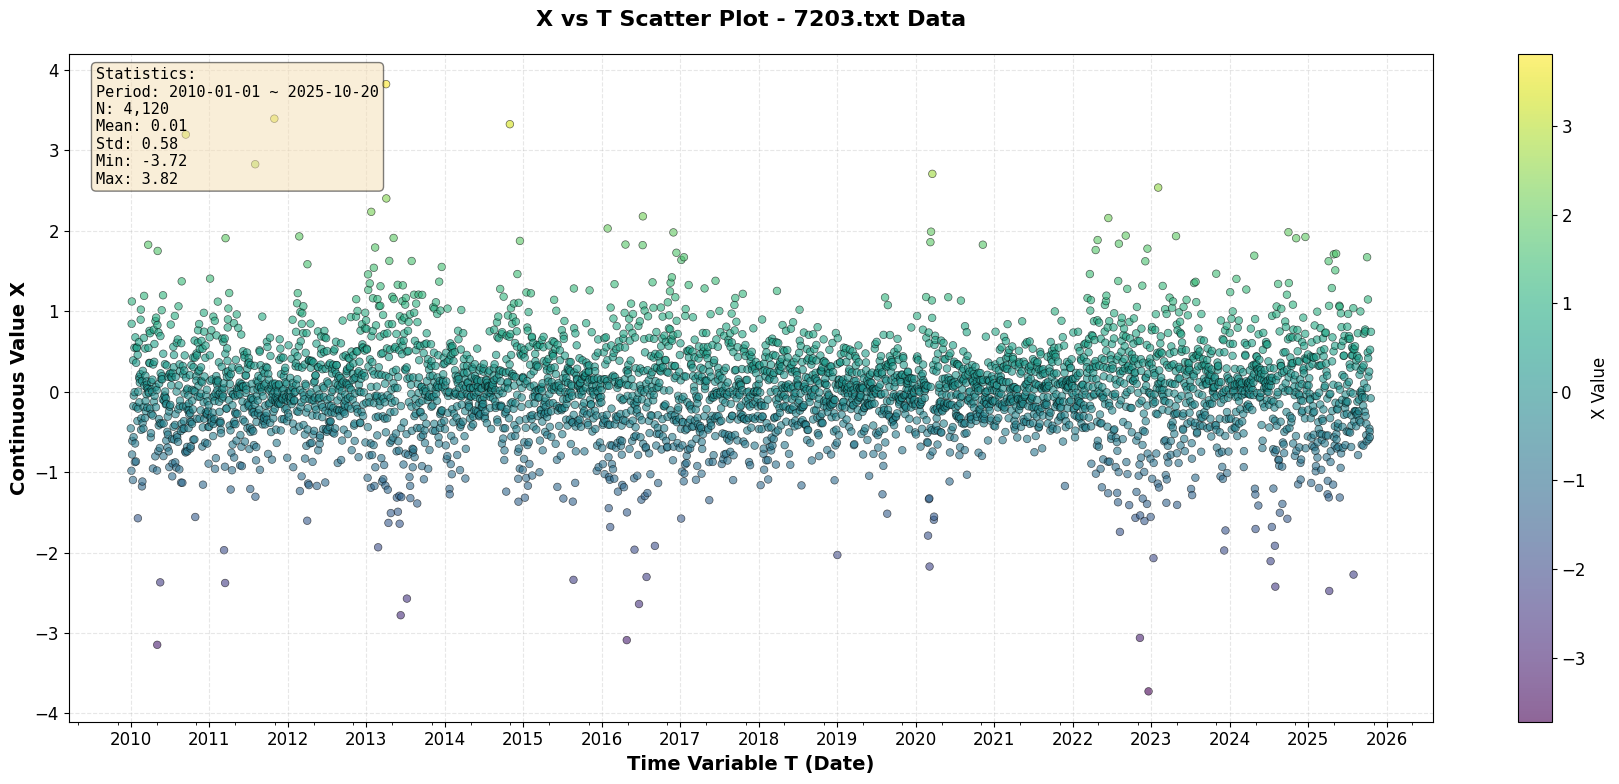

✓ Scatter plot completed


In [ ]:
# ============================================================================
# Scatter Plot (X vs T)
# ============================================================================

fig, ax = plt.subplots(figsize=(18, 8))

# Draw scatter plot (color-mapped by X value)
scatter = ax.scatter(T, X, c=X, cmap='viridis', s=30, alpha=0.6, 
                     edgecolors='black', linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('X Value', fontsize=12)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Axis labels and title
ax.set_xlabel('Time Variable T (Date)', fontsize=14, fontweight='bold')
ax.set_ylabel('Continuous Value X', fontsize=14, fontweight='bold')
ax.set_title('X vs T Scatter Plot - USD/JPY.txt Data', fontsize=16, fontweight='bold', pad=20)

# Adjust date format on X-axis (fewer labels)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())  # Show every year
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=6))  # Minor ticks every 6 months
plt.xticks(rotation=0)  # No rotation needed for years

# Display statistics in text box
stats_text = f'Statistics:\n'
stats_text += f'Period: {T.min().date()} ~ {T.max().date()}\n'
stats_text += f'N: {len(X):,}\n'
stats_text += f'Mean: {X.mean():.2f}\n'
stats_text += f'Std: {X.std():.2f}\n'
stats_text += f'Min: {X.min():.2f}\n'
stats_text += f'Max: {X.max():.2f}'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props, family='monospace')

plt.tight_layout()
plt.show()

print("✓ Scatter plot completed")

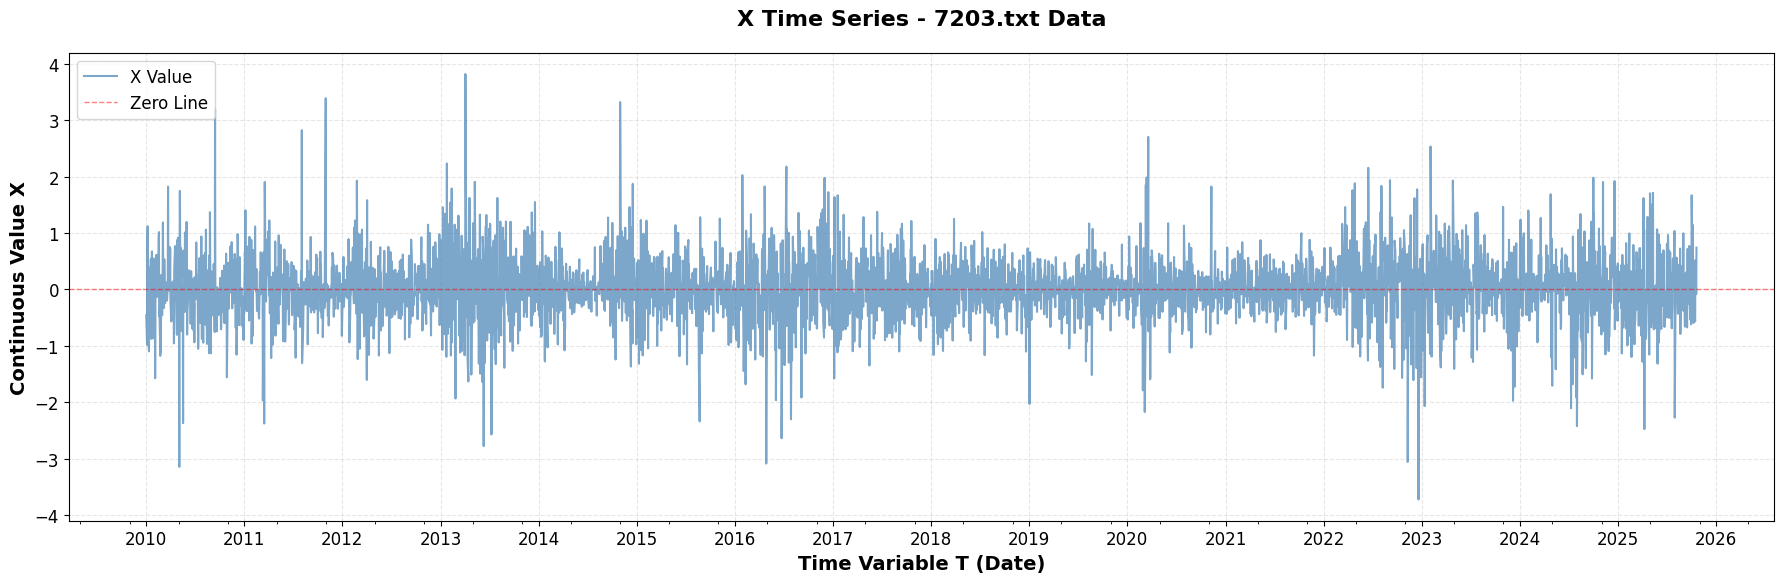

✓ Time series line plot completed


In [7]:
# ============================================================================
# Time Series Line Plot
# ============================================================================

fig, ax = plt.subplots(figsize=(18, 6))

# Line plot
ax.plot(T, X, linewidth=1.5, color='steelblue', alpha=0.7, label='X Value')

# Add zero line
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Zero Line')

# Grid
ax.grid(True, alpha=0.3, linestyle='--')

# Axis labels and title
ax.set_xlabel('Time Variable T (Date)', fontsize=14, fontweight='bold')
ax.set_ylabel('Continuous Value X', fontsize=14, fontweight='bold')
ax.set_title('X Time Series - 7203.txt Data', fontsize=16, fontweight='bold', pad=20)

# Date format on X-axis (fewer labels)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())  # Show every year
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=6))  # Minor ticks every 6 months
plt.xticks(rotation=0)  # No rotation needed for years

# Legend
ax.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

print("✓ Time series line plot completed")

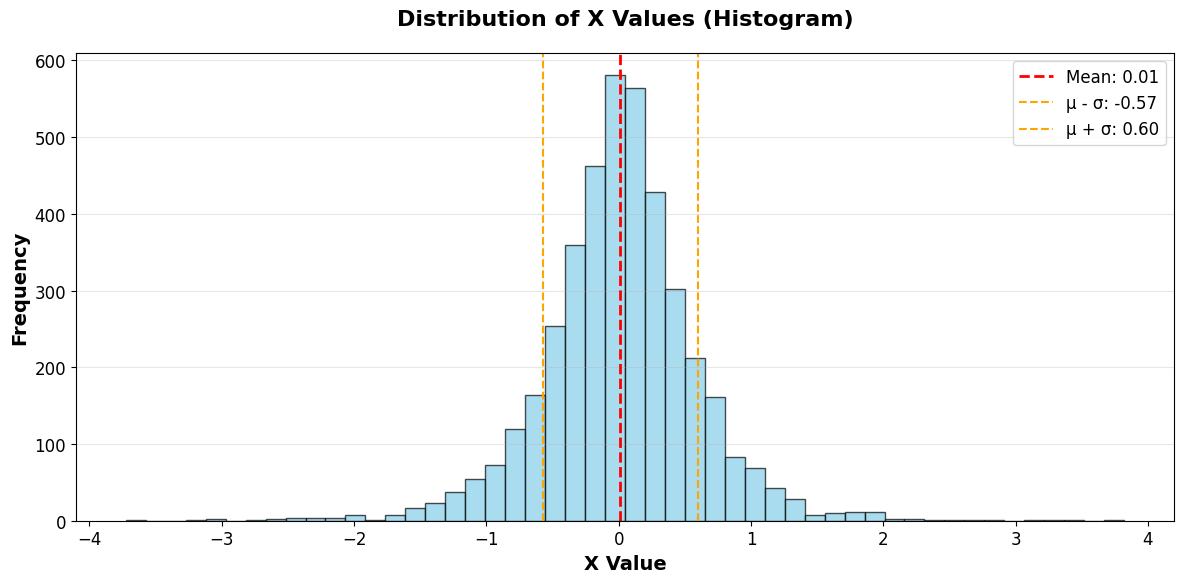

✓ Histogram completed


In [8]:
# ============================================================================
# Distribution of X (Histogram)
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 6))

# Histogram
n, bins, patches = ax.hist(X, bins=50, alpha=0.7, color='skyblue', edgecolor='black')

# Vertical lines for mean and standard deviation
mean_x = X.mean()
std_x = X.std()
ax.axvline(mean_x, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_x:.2f}')
ax.axvline(mean_x - std_x, color='orange', linestyle='--', linewidth=1.5, 
           label=f'μ - σ: {mean_x - std_x:.2f}')
ax.axvline(mean_x + std_x, color='orange', linestyle='--', linewidth=1.5, 
           label=f'μ + σ: {mean_x + std_x:.2f}')

# Grid and axis labels
ax.grid(True, alpha=0.3, axis='y')
ax.set_xlabel('X Value', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax.set_title('Distribution of X Values (Histogram)', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

print("✓ Histogram completed")

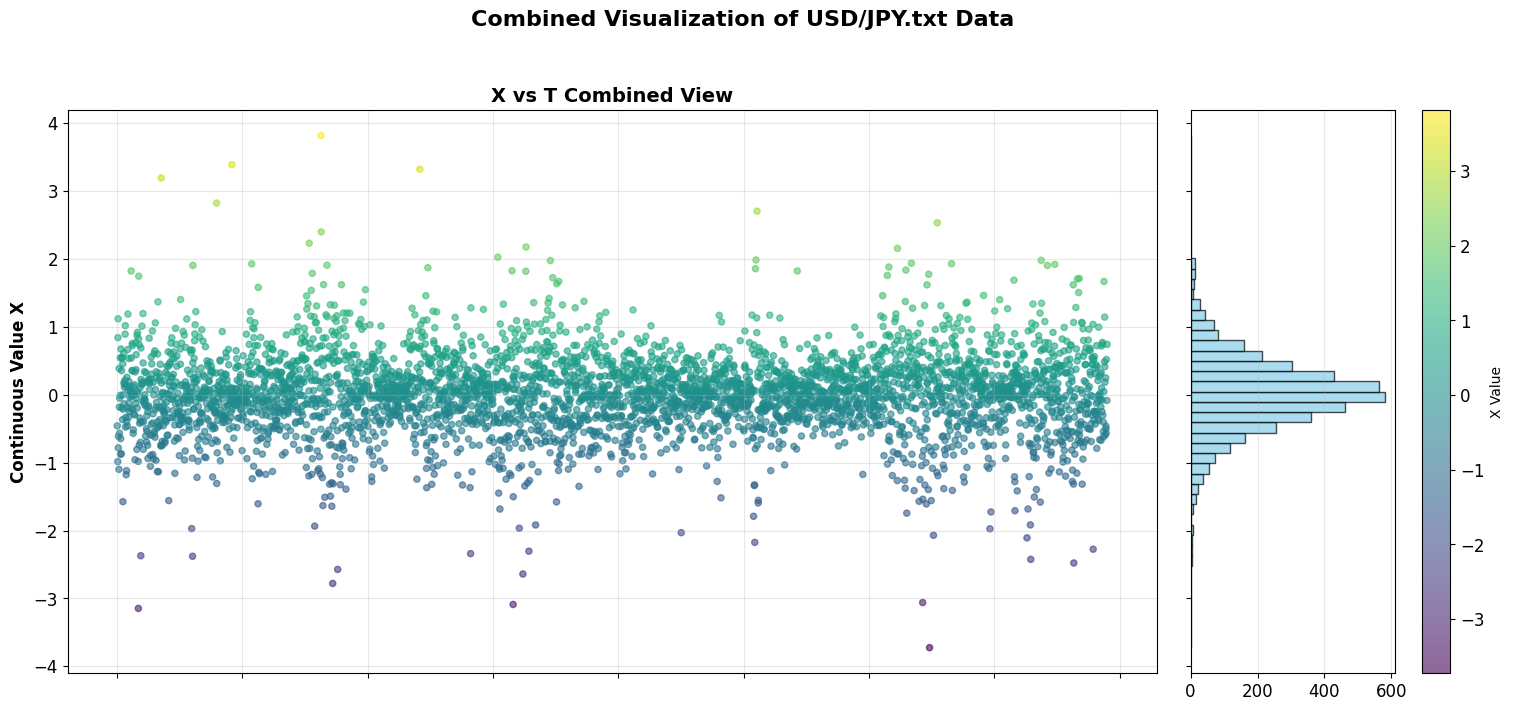

✓ Combined view completed


In [10]:
# ============================================================================
# Combined View (Scatter Plot + Histogram)
# ============================================================================

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[3, 1], width_ratios=[4, 1], 
                      hspace=0.05, wspace=0.05)

# Main scatter plot
ax_main = fig.add_subplot(gs[0, 0])
scatter = ax_main.scatter(T, X, c=X, cmap='viridis', s=20, alpha=0.6)
ax_main.grid(True, alpha=0.3)
ax_main.set_ylabel('Continuous Value X', fontsize=12, fontweight='bold')
ax_main.set_title('X vs T Combined View', fontsize=14, fontweight='bold')
ax_main.tick_params(labelbottom=False)

# Right histogram (X value distribution)
ax_right = fig.add_subplot(gs[0, 1], sharey=ax_main)
ax_right.hist(X, bins=50, orientation='horizontal', alpha=0.7, color='skyblue', edgecolor='black')
ax_right.tick_params(labelleft=False)
ax_right.grid(True, alpha=0.3, axis='x')

# Colorbar
cbar = plt.colorbar(scatter, ax=ax_right, pad=0.1)
cbar.set_label('X Value', fontsize=10)

plt.suptitle('Combined Visualization of USD/JPY.txt Data', fontsize=16, fontweight='bold', y=0.98)
plt.show()

print("✓ Combined view completed")

データ読み込み完了: 4120レコード
属性数: 60
X値の範囲: -3.725 ~ 3.820
X値の全体標準偏差: 0.583
ルール数: 19266
ルール0の詳細分析

=== ルール 0 の分析 ===
ルール条件: [{'attr': 'CADJPY', 'value': 'Up', 'delay': 1}, {'attr': 'EURCHF', 'value': 'Up', 'delay': 1}]
  条件 CADJPY_Up(t-1): 2105件マッチ
  条件 EURCHF_Up(t-1): 1944件マッチ
全条件マッチ: 1175件


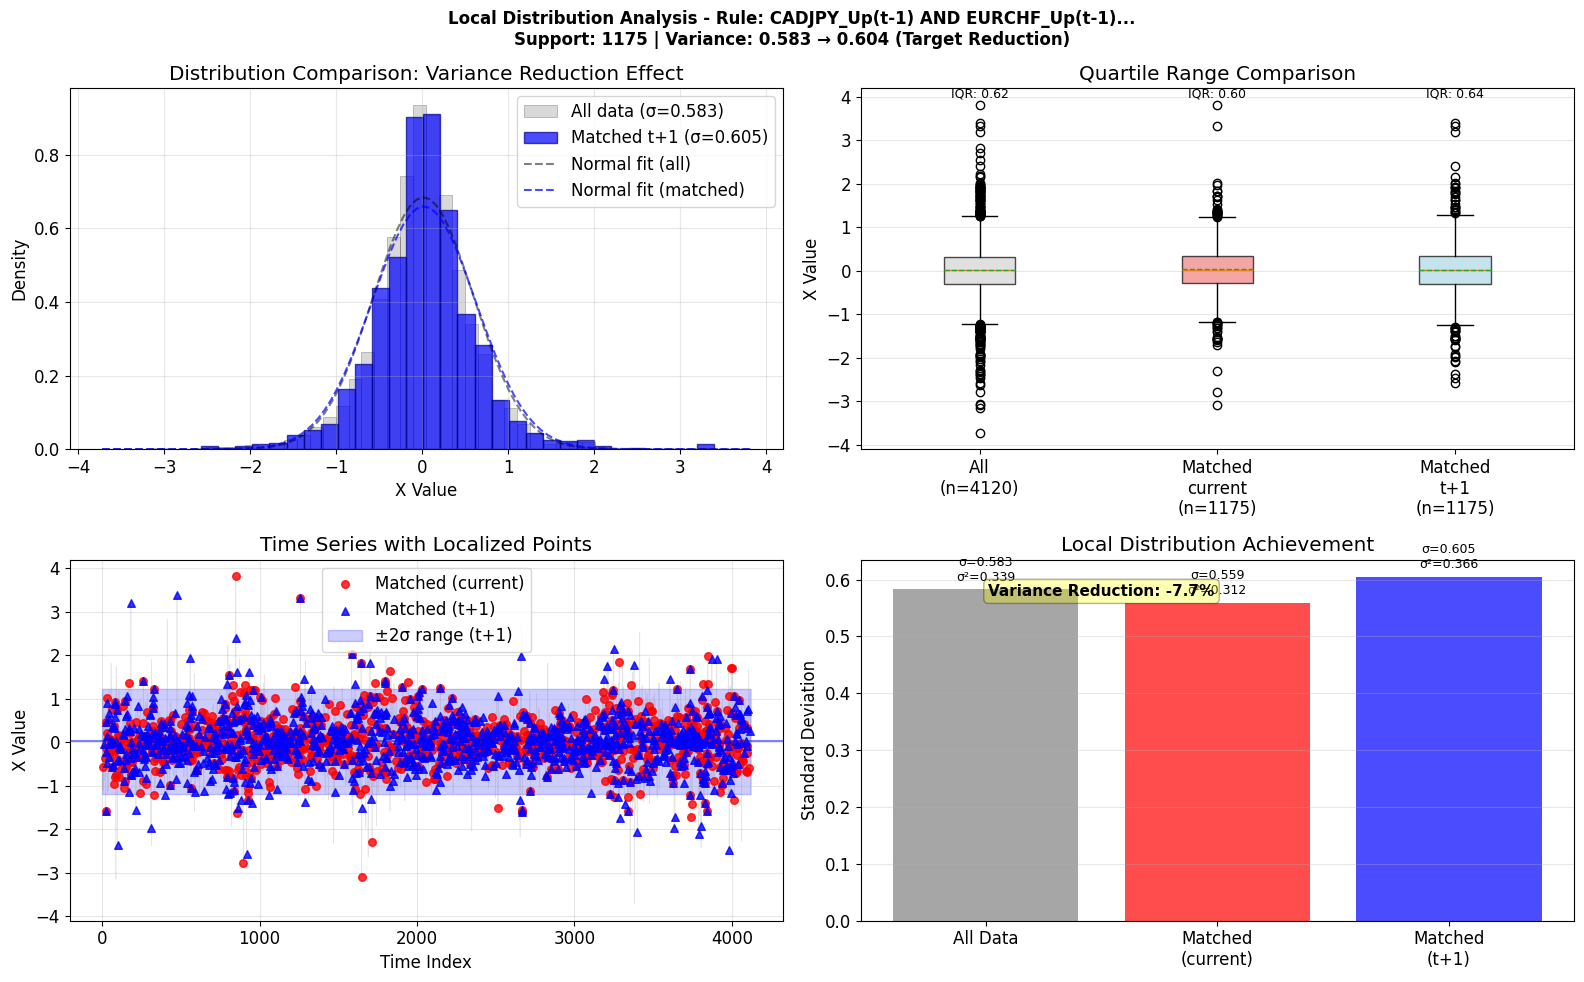


=== ルール 0 の分析 ===
ルール条件: [{'attr': 'CADJPY', 'value': 'Up', 'delay': 1}, {'attr': 'EURCHF', 'value': 'Up', 'delay': 1}]
  条件 CADJPY_Up(t-1): 2105件マッチ
  条件 EURCHF_Up(t-1): 1944件マッチ
全条件マッチ: 1175件

=== 局所的分布の統計検証 ===

【基本統計量】
全データ: μ=0.014, σ=0.583, n=4120
マッチ(現在): μ=0.030, σ=0.559, n=1175
マッチ(t+1): μ=0.019, σ=0.605, n=1175

【分散の等質性検定】
Levene検定: F=0.606, p=0.4365
F検定: F=0.929, p=0.1102

【効果量】
分散減少率: -7.7%
Cohen's d: -0.009

【判定】
✗ 統計的に有意な差なし
✗ 分散減少が小さい（<10%）

上位ルールの比較分析

=== ルール 17150 の分析 ===
ルール条件: [{'attr': 'NZDUSD', 'value': 'Down', 'delay': 1}, {'attr': 'USDCHF', 'value': 'Up', 'delay': 3}, {'attr': 'EURGBP', 'value': 'Down', 'delay': 4}, {'attr': 'GBPCAD', 'value': 'Up', 'delay': 1}, {'attr': 'GBPCAD', 'value': 'Down', 'delay': 0}]
  条件 NZDUSD_Down(t-1): 2040件マッチ
  条件 USDCHF_Up(t-3): 2111件マッチ
  条件 EURGBP_Down(t-4): 2048件マッチ
  条件 GBPCAD_Up(t-1): 2083件マッチ
  条件 GBPCAD_Down(t-0): 2021件マッチ
全条件マッチ: 134件

=== 局所的分布の統計検証 ===

【基本統計量】
全データ: μ=0.014, σ=0.583, n=4120
マッチ(現在): μ=0.097, σ=0.581,

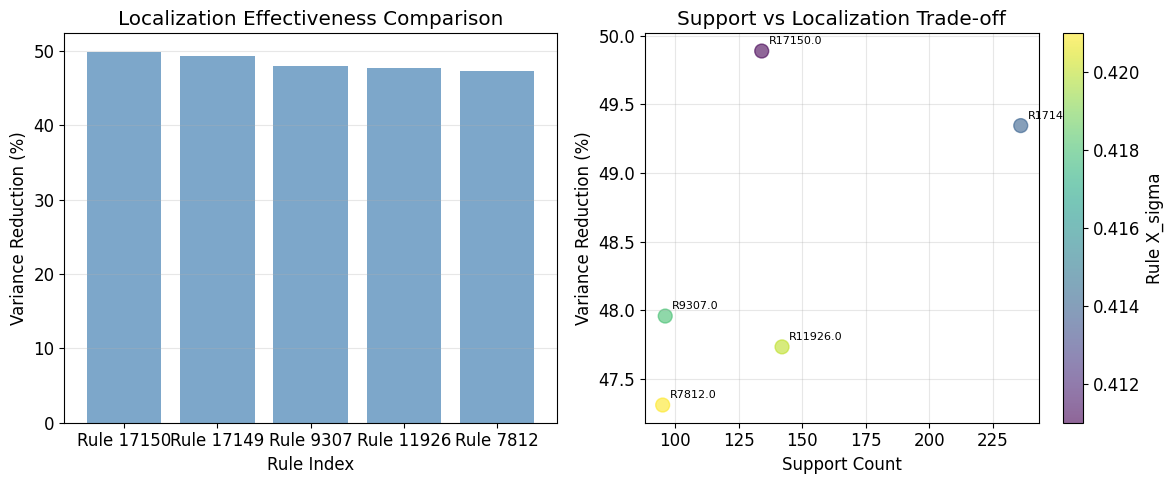


【ルール比較結果】
   rule_index  n_matched  variance_reduction  matched_future_std  rule_x_sigma
0       17150        134           49.887860            0.412464         0.411
1       17149        236           49.345112            0.414692         0.414
2        9307         96           47.958656            0.420329         0.418
3       11926        142           47.734424            0.421233         0.420
4        7812         95           47.311164            0.422935         0.421


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats as scipy_stats
import warnings
warnings.filterwarnings('ignore')

class TimeSeriesRuleVisualizer:
    def __init__(self, data_path='/Users/suzukiyasuhiro/Desktop/study/ts-itemsbs/forex_data/gnminer_individual/USDJPY.txt',
                 rule_file='/Users/suzukiyasuhiro/Desktop/study/ts-itemsbs/output/USDJPY/pool/zrp01a.txt'):
        self.data_path = data_path
        self.rule_file = rule_file
        self.df = None
        self.rules = None
        self.attribute_names = []
        
        # 離散化の閾値（GNMinerのコードと同じ値）
        self.UP_THRESHOLD = 0.5
        self.DOWN_THRESHOLD = -0.5
        
    def load_data(self):
        """CSVデータを読み込み、属性名をマッピング"""
        # データを読み込み
        self.df = pd.read_csv(self.data_path)
        
        # 列名から属性名を取得（T, X以外が属性）
        self.attribute_names = [col for col in self.df.columns if col not in ['T', 'X']]
        
        # T列を日付型に変換
        if 'T' in self.df.columns:
            self.df['T'] = pd.to_datetime(self.df['T'])
        
        print(f"データ読み込み完了: {len(self.df)}レコード")
        print(f"属性数: {len(self.attribute_names)}")
        print(f"X値の範囲: {self.df['X'].min():.3f} ~ {self.df['X'].max():.3f}")
        print(f"X値の全体標準偏差: {self.df['X'].std():.3f}")
        
        return self.df
    
    def load_rules(self):
        """ルールファイルを読み込み"""
        self.rules = pd.read_csv(self.rule_file, sep='\t')
        print(f"ルール数: {len(self.rules)}")
        return self.rules
    
    def parse_rule_condition(self, rule_str):
        """
        ルール文字列を解析
        例: "6472_Stay(t-0)" -> {'attr': '6472', 'value': 'Stay', 'delay': 0}
        """
        # バイト型を文字列に変換
        if isinstance(rule_str, bytes):
            rule_str = rule_str.decode('utf-8')
        
        # 文字列型に変換
        rule_str = str(rule_str)
        
        if rule_str == '0' or pd.isna(rule_str) or rule_str == 'nan':
            return None
            
        # パターンマッチング: 属性名_値(t-遅延)
        match = re.match(r'(.+?)_(Up|Stay|Down)\(t-(\d+)\)', rule_str)
        if match:
            return {
                'attr': match.group(1),
                'value': match.group(2),
                'delay': int(match.group(3))
            }
        return None
    
    def check_attribute_condition(self, attr_name, value_type):
        """
        GNMinerの離散化済みデータに対応した条件チェック
        属性名から対応する列を見つけて、その値が1かどうかをチェック
        """
        # 属性名パターンに対応する列を探す
        # 例: "6472_Stay" という条件の場合、"6472_Stay"列を探す
        column_name = f"{attr_name}_{value_type}"
        
        if column_name in self.df.columns:
            return column_name
        
        # 別の命名パターンも試す（例: 属性番号のみ）
        if attr_name in self.df.columns:
            return attr_name
            
        return None
    
    def apply_rule_filter(self, rule_index=0):
        """
        指定されたルールの条件でデータをフィルタリング
        """
        if self.rules is None:
            self.load_rules()
            
        rule = self.rules.iloc[rule_index]
        
        # ルール条件を解析
        conditions = []
        for i in range(1, 9):  # Attr1 ~ Attr8
            attr_col = f'Attr{i}'
            if attr_col in rule:
                cond = self.parse_rule_condition(rule[attr_col])
                if cond:
                    conditions.append(cond)
        
        print(f"\n=== ルール {rule_index} の分析 ===")
        print(f"ルール条件: {conditions}")
        
        # マッチングを試みる
        mask = pd.Series([True] * len(self.df))
        
        for cond in conditions:
            attr_name = cond['attr']
            value_type = cond['value']
            delay = cond['delay']
            
            # 対応する列を見つける
            column = self.check_attribute_condition(attr_name, value_type)
            
            if column:
                # 各行について条件をチェック
                cond_mask = pd.Series([False] * len(self.df))
                
                for idx in range(delay, len(self.df) - 1):  # -1はPREDICTION_SPAN用
                    past_idx = idx - delay
                    if past_idx >= 0:
                        # GNMinerでは離散化済みなので、値が1かチェック
                        if self.df.iloc[past_idx][column] == 1:
                            cond_mask.iloc[idx] = True
                
                mask = mask & cond_mask
                print(f"  条件 {attr_name}_{value_type}(t-{delay}): {cond_mask.sum()}件マッチ")
            else:
                # 列が見つからない場合の代替処理
                print(f"  警告: 列 {attr_name}_{value_type} が見つかりません")
        
        # マッチしたデータを返す
        matched_indices = mask[mask].index
        print(f"全条件マッチ: {len(matched_indices)}件")
        
        return matched_indices, rule
    
    def plot_local_distribution_analysis(self, rule_index=0, figsize=(16, 10)):
        """
        局所的分布の検証に特化した可視化
        """
        if self.df is None:
            self.load_data()
            
        matched_indices, rule = self.apply_rule_filter(rule_index)
        
        if len(matched_indices) == 0:
            print("マッチするデータがありません")
            return None
        
        # 4分割のサブプロット
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        
        # 全データの統計
        all_mean = self.df['X'].mean()
        all_std = self.df['X'].std()
        
        # マッチデータの統計
        matched_current = self.df.iloc[matched_indices]['X']
        future_indices = matched_indices + 1
        future_indices = future_indices[future_indices < len(self.df)]
        matched_future = self.df.iloc[future_indices]['X'] if len(future_indices) > 0 else pd.Series()
        
        # 1. ヒストグラム比較（左上）
        ax1 = axes[0, 0]
        
        # 全データのヒストグラム
        ax1.hist(self.df['X'], bins=50, alpha=0.3, color='gray', 
                 label=f'All data (σ={all_std:.3f})', density=True, edgecolor='black', linewidth=0.5)
        
        if len(matched_future) > 0:
            # マッチしたデータの予測時点（t+1）
            ax1.hist(matched_future, bins=30, alpha=0.7, color='blue',
                    label=f'Matched t+1 (σ={matched_future.std():.3f})', 
                    density=True, edgecolor='darkblue', linewidth=1)
        
        # 正規分布フィット
        x_range = np.linspace(self.df['X'].min(), self.df['X'].max(), 100)
        ax1.plot(x_range, scipy_stats.norm.pdf(x_range, all_mean, all_std), 
                'k--', alpha=0.5, label='Normal fit (all)')
        
        if len(matched_future) > 0:
            ax1.plot(x_range, scipy_stats.norm.pdf(x_range, matched_future.mean(), matched_future.std()),
                    'b--', alpha=0.7, label='Normal fit (matched)')
        
        ax1.set_xlabel('X Value')
        ax1.set_ylabel('Density')
        ax1.set_title('Distribution Comparison: Variance Reduction Effect')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. ボックスプロット（右上）
        ax2 = axes[0, 1]
        
        box_data = []
        labels = []
        
        box_data.append(self.df['X'])
        labels.append(f'All\n(n={len(self.df)})')
        
        if len(matched_current) > 0:
            box_data.append(matched_current)
            labels.append(f'Matched\ncurrent\n(n={len(matched_current)})')
        
        if len(matched_future) > 0:
            box_data.append(matched_future)
            labels.append(f'Matched\nt+1\n(n={len(matched_future)})')
        
        bp = ax2.boxplot(box_data, labels=labels, patch_artist=True,
                         showmeans=True, meanline=True)
        
        colors = ['lightgray', 'lightcoral', 'lightblue']
        for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        # IQRを表示
        for i, data in enumerate(box_data):
            q1, q3 = np.percentile(data, [25, 75])
            iqr = q3 - q1
            ax2.text(i+1, ax2.get_ylim()[1] * 0.95, f'IQR: {iqr:.2f}', 
                    ha='center', fontsize=9)
        
        ax2.set_ylabel('X Value')
        ax2.set_title('Quartile Range Comparison')
        ax2.grid(True, alpha=0.3, axis='y')
        
        # 3. 時系列での局所性（左下）
        ax3 = axes[1, 0]
        
        # 時系列プロット
        ax3.plot(range(len(self.df)), self.df['X'], 
                alpha=0.2, color='gray', linewidth=0.5)
        
        if len(matched_indices) > 0:
            # マッチした点を強調
            ax3.scatter(matched_indices, matched_current,
                       alpha=0.8, s=30, c='red', label='Matched (current)', zorder=5)
            
            if len(future_indices) > 0:
                ax3.scatter(future_indices, matched_future,
                           alpha=0.8, s=30, c='blue', marker='^', 
                           label='Matched (t+1)', zorder=5)
            
            # 信頼区間を表示
            if len(matched_future) > 0:
                future_mean = matched_future.mean()
                future_std = matched_future.std()
                ax3.axhline(y=future_mean, color='blue', linestyle='-', alpha=0.5)
                ax3.fill_between(range(len(self.df)), 
                                future_mean - 2*future_std, 
                                future_mean + 2*future_std,
                                alpha=0.2, color='blue', 
                                label=f'±2σ range (t+1)')
        
        ax3.set_xlabel('Time Index')
        ax3.set_ylabel('X Value')
        ax3.set_title('Time Series with Localized Points')
        ax3.legend(loc='best')
        ax3.grid(True, alpha=0.3)
        
        # 4. 分散の比較（右下）
        ax4 = axes[1, 1]
        
        # 分散減少の可視化
        categories = ['All Data', 'Matched\n(current)', 'Matched\n(t+1)']
        variances = [self.df['X'].var()]
        stds = [self.df['X'].std()]
        colors_bar = ['gray']
        
        if len(matched_current) > 0:
            variances.append(matched_current.var())
            stds.append(matched_current.std())
            colors_bar.append('red')
        
        if len(matched_future) > 0:
            variances.append(matched_future.var())
            stds.append(matched_future.std())
            colors_bar.append('blue')
        
        x_pos = range(len(variances))
        bars = ax4.bar(x_pos, stds, color=colors_bar, alpha=0.7)
        
        # 値をバーの上に表示
        for i, (bar, std, var) in enumerate(zip(bars, stds, variances)):
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'σ={std:.3f}\nσ²={var:.3f}',
                    ha='center', va='bottom', fontsize=9)
        
        # 減少率を表示
        if len(matched_future) > 0:
            reduction = (1 - matched_future.var()/self.df['X'].var()) * 100
            ax4.text(0.5, ax4.get_ylim()[1] * 0.9,
                    f'Variance Reduction: {reduction:.1f}%',
                    ha='center', fontsize=11, fontweight='bold',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
        
        ax4.set_xticks(x_pos)
        ax4.set_xticklabels(categories[:len(variances)])
        ax4.set_ylabel('Standard Deviation')
        ax4.set_title('Local Distribution Achievement')
        ax4.grid(True, alpha=0.3, axis='y')
        
        # 全体タイトル
        rule_conditions = []
        for i in range(1, 9):
            attr_col = f'Attr{i}'
            if attr_col in rule:
                val = str(rule[attr_col])
                if val != '0' and val != 'nan' and pd.notna(val):
                    rule_conditions.append(val)
        
        fig.suptitle(f'Local Distribution Analysis - Rule: {" AND ".join(rule_conditions[:2])}...\n' +
                    f'Support: {len(matched_indices)} | ' +
                    f'Variance: {self.df["X"].std():.3f} → {rule["X_sigma"]:.3f} ' +
                    f'(Target Reduction)',
                    fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        return fig
    
    def verify_local_distribution(self, rule_index=0):
        """
        局所的分布の統計的検証
        """
        matched_indices, rule = self.apply_rule_filter(rule_index)
        
        if len(matched_indices) < 2:
            print("統計検証に十分なデータがありません")
            return None
        
        # データ準備
        all_data = self.df['X']
        matched_current = self.df.iloc[matched_indices]['X']
        
        future_indices = matched_indices + 1
        future_indices = future_indices[future_indices < len(self.df)]
        matched_future = self.df.iloc[future_indices]['X'] if len(future_indices) > 0 else pd.Series()
        
        print("\n=== 局所的分布の統計検証 ===")
        
        # 基本統計
        print("\n【基本統計量】")
        print(f"全データ: μ={all_data.mean():.3f}, σ={all_data.std():.3f}, n={len(all_data)}")
        print(f"マッチ(現在): μ={matched_current.mean():.3f}, σ={matched_current.std():.3f}, n={len(matched_current)}")
        if len(matched_future) > 0:
            print(f"マッチ(t+1): μ={matched_future.mean():.3f}, σ={matched_future.std():.3f}, n={len(matched_future)}")
        
        # 分散の検定
        p_value = np.nan  # デフォルト値
        if len(matched_future) > 1:
            print("\n【分散の等質性検定】")
            
            # Levene検定
            f_stat, p_value = scipy_stats.levene(all_data, matched_future)
            print(f"Levene検定: F={f_stat:.3f}, p={p_value:.4f}")
            
            # F検定
            f_ratio = all_data.var() / matched_future.var()
            df1, df2 = len(all_data) - 1, len(matched_future) - 1
            p_f = 2 * min(scipy_stats.f.cdf(f_ratio, df1, df2), 1 - scipy_stats.f.cdf(f_ratio, df1, df2))
            print(f"F検定: F={f_ratio:.3f}, p={p_f:.4f}")
            
            # 効果量
            print("\n【効果量】")
            variance_reduction = (1 - matched_future.var()/all_data.var()) * 100
            print(f"分散減少率: {variance_reduction:.1f}%")
            
            # Cohen's d
            cohens_d = (all_data.mean() - matched_future.mean()) / np.sqrt((all_data.var() + matched_future.var()) / 2)
            print(f"Cohen's d: {cohens_d:.3f}")
            
            # 判定
            print("\n【判定】")
            if p_value < 0.05:
                print("✓ 統計的に有意な分散の違いあり（局所化成功）")
            else:
                print("✗ 統計的に有意な差なし")
            
            if variance_reduction > 30:
                print("✓ 実質的に意味のある分散減少（>30%）")
            elif variance_reduction > 10:
                print("△ 中程度の分散減少（10-30%）")
            else:
                print("✗ 分散減少が小さい（<10%）")
        
        result_stats = {
            'n_matched': len(matched_indices),
            'all_mean': all_data.mean(),
            'all_std': all_data.std(),
            'matched_future_mean': matched_future.mean() if len(matched_future) > 0 else np.nan,
            'matched_future_std': matched_future.std() if len(matched_future) > 0 else np.nan,
            'variance_reduction': (1 - matched_future.var()/all_data.var())*100 if len(matched_future) > 0 else 0,
            'p_value': p_value
        }
        
        return result_stats
    
    def compare_multiple_rules(self, rule_indices=None, top_n=5):
        """
        複数のルールの局所化効果を比較
        """
        if self.rules is None:
            self.load_rules()
        
        if rule_indices is None:
            # X_sigmaが小さい上位N個を選択
            rule_indices = self.rules.nsmallest(top_n, 'X_sigma').index
        
        results = []
        
        for idx in rule_indices:
            result_stats = self.verify_local_distribution(idx)
            if result_stats:
                result_stats['rule_index'] = idx
                result_stats['rule_x_sigma'] = self.rules.iloc[idx]['X_sigma']
                results.append(result_stats)
        
        # 結果をDataFrameに変換
        df_results = pd.DataFrame(results)
        
        # 可視化
        if len(df_results) > 0:
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            
            # 分散減少率の比較
            ax1 = axes[0]
            ax1.bar(range(len(df_results)), df_results['variance_reduction'],
                   color='steelblue', alpha=0.7)
            ax1.set_xlabel('Rule Index')
            ax1.set_ylabel('Variance Reduction (%)')
            ax1.set_title('Localization Effectiveness Comparison')
            ax1.set_xticks(range(len(df_results)))
            ax1.set_xticklabels([f'Rule {i}' for i in df_results['rule_index']])
            ax1.grid(True, alpha=0.3, axis='y')
            
            # サポート数 vs 分散減少率
            ax2 = axes[1]
            scatter = ax2.scatter(df_results['n_matched'], 
                                df_results['variance_reduction'],
                                s=100, alpha=0.6, c=df_results['rule_x_sigma'],
                                cmap='viridis')
            ax2.set_xlabel('Support Count')
            ax2.set_ylabel('Variance Reduction (%)')
            ax2.set_title('Support vs Localization Trade-off')
            ax2.grid(True, alpha=0.3)
            
            # カラーバー
            cbar = plt.colorbar(scatter, ax=ax2)
            cbar.set_label('Rule X_sigma')
            
            # ルールインデックスを表示
            for _, row in df_results.iterrows():
                ax2.annotate(f"R{row['rule_index']}", 
                           (row['n_matched'], row['variance_reduction']),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
            
            plt.tight_layout()
            plt.show()
        
        return df_results

# 使用例
if __name__ == "__main__":
    # 可視化オブジェクトを作成
    visualizer = TimeSeriesRuleVisualizer()
    
    # データとルールを読み込み
    visualizer.load_data()
    visualizer.load_rules()
    
    # ルール0の局所的分布を詳細分析
    print("="*50)
    print("ルール0の詳細分析")
    print("="*50)
    
    # 局所的分布の可視化
    fig = visualizer.plot_local_distribution_analysis(rule_index=0)
    if fig:
        plt.show()
    
    # 統計的検証
    result_stats = visualizer.verify_local_distribution(rule_index=0)
    
    # 複数ルールの比較（オプション）
    print("\n" + "="*50)
    print("上位ルールの比較分析")
    print("="*50)
    comparison_df = visualizer.compare_multiple_rules(top_n=5)
    
    if comparison_df is not None and not comparison_df.empty:
        print("\n【ルール比較結果】")
        print(comparison_df[['rule_index', 'n_matched', 'variance_reduction', 
                            'matched_future_std', 'rule_x_sigma']].to_string())

データ読み込み完了: 5268レコード
属性数: 657
X値の範囲: -11.590 ~ 15.530
ルール数: 2000

全ルールの局所化効果を評価中...
進捗: 0/2000ルール評価済み
進捗: 100/2000ルール評価済み
進捗: 200/2000ルール評価済み
進捗: 300/2000ルール評価済み
進捗: 400/2000ルール評価済み
進捗: 500/2000ルール評価済み
進捗: 600/2000ルール評価済み
進捗: 700/2000ルール評価済み
進捗: 800/2000ルール評価済み
進捗: 900/2000ルール評価済み
進捗: 1000/2000ルール評価済み
進捗: 1100/2000ルール評価済み
進捗: 1200/2000ルール評価済み
進捗: 1300/2000ルール評価済み
進捗: 1400/2000ルール評価済み
進捗: 1500/2000ルール評価済み
進捗: 1600/2000ルール評価済み
進捗: 1700/2000ルール評価済み
進捗: 1800/2000ルール評価済み
進捗: 1900/2000ルール評価済み

評価完了: 2000ルール

【局所化効果 Top 10】
      rule_index      score  n_matched  variance_reduction  future_std   p_value
1188        1188  88.000000        220           53.594297    1.242039  0.000025
802          802  87.967875        219           49.867875    1.290944  0.000216
949          949  87.200000        228           50.082521    1.288177  0.000049
92            92  84.212826        231           47.312826    1.323433  0.002652
638          638  84.198473        238           47.998473    1.314793  0

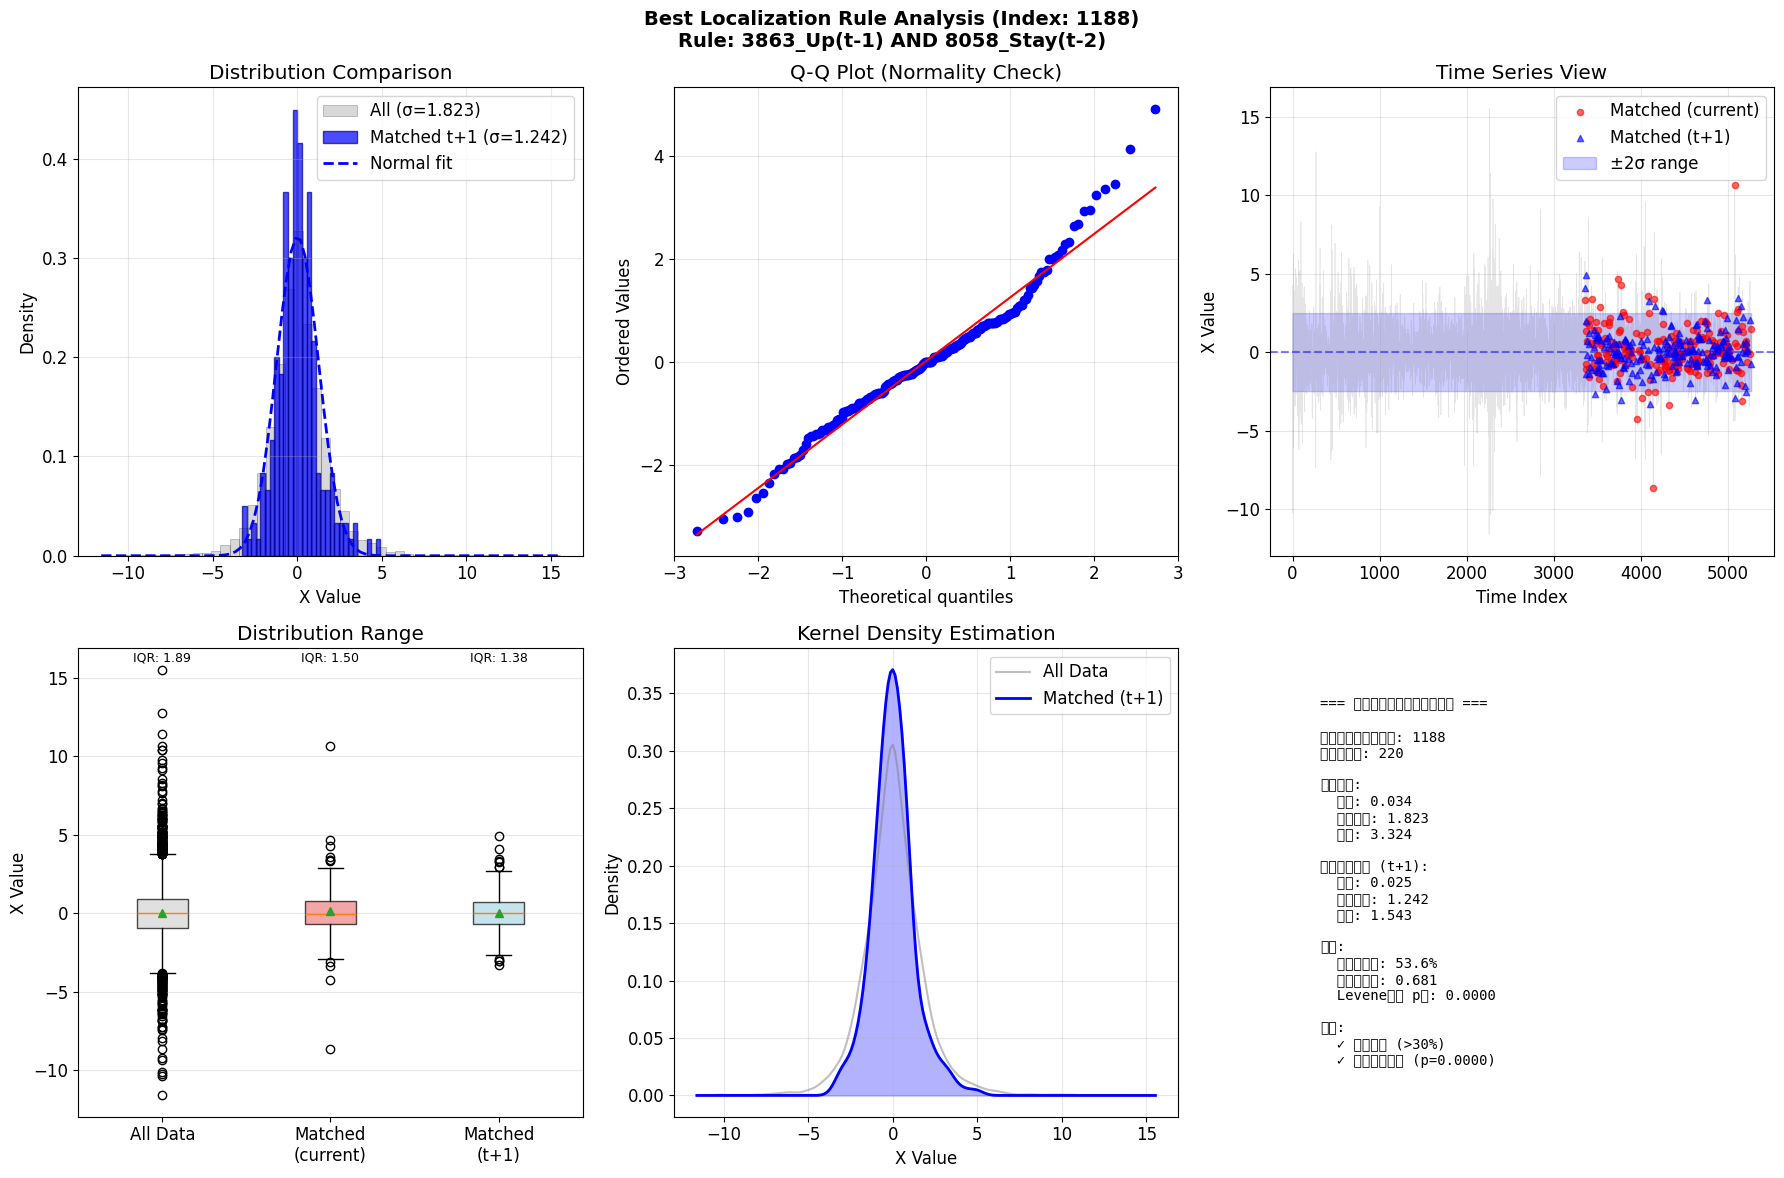

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats as scipy_stats
import warnings
warnings.filterwarnings('ignore')

class RuleLocalizationAnalyzer:
    def __init__(self, data_path='/Users/suzukiyasuhiro/Desktop/study/ts-itemsbs/forex_data/gnminer_individual/USDJPY.txt',
                 rule_file='/Users/suzukiyasuhiro/Desktop/study/ts-itemsbs/output/USDJPY/pool/zrp01a.txt'):
        self.data_path = data_path
        self.rule_file = rule_file
        self.df = None
        self.rules = None
        self.attribute_names = []
        
    def load_data(self):
        """データ読み込み"""
        self.df = pd.read_csv(self.data_path)
        self.attribute_names = [col for col in self.df.columns if col not in ['T', 'X']]
        
        if 'T' in self.df.columns:
            self.df['T'] = pd.to_datetime(self.df['T'])
        
        print(f"データ読み込み完了: {len(self.df)}レコード")
        print(f"属性数: {len(self.attribute_names)}")
        print(f"X値の範囲: {self.df['X'].min():.3f} ~ {self.df['X'].max():.3f}")
        
        return self.df
    
    def load_rules(self):
        """ルール読み込み"""
        self.rules = pd.read_csv(self.rule_file, sep='\t')
        print(f"ルール数: {len(self.rules)}")
        return self.rules
    
    def parse_rule_condition(self, rule_str):
        """ルール条件解析"""
        if isinstance(rule_str, bytes):
            rule_str = rule_str.decode('utf-8')
        
        rule_str = str(rule_str)
        
        if rule_str == '0' or pd.isna(rule_str) or rule_str == 'nan':
            return None
            
        match = re.match(r'(.+?)_(Up|Stay|Down)\(t-(\d+)\)', rule_str)
        if match:
            return {
                'attr': match.group(1),
                'value': match.group(2),
                'delay': int(match.group(3))
            }
        return None
    
    def apply_rule_conditions(self, rule, verbose=False):
        """ルール条件適用してマッチングインデックスを返す"""
        conditions = []
        for i in range(1, 9):
            attr_col = f'Attr{i}'
            if attr_col in rule:
                cond = self.parse_rule_condition(rule[attr_col])
                if cond:
                    conditions.append(cond)
        
        if len(conditions) == 0:
            return pd.Index([])
        
        mask = pd.Series([True] * len(self.df))
        
        for cond in conditions:
            attr_name = cond['attr']
            value_type = cond['value']
            delay = cond['delay']
            
            # 複数の列名パターンを試す
            possible_columns = [
                f"{attr_name}_{value_type}",
                f"{attr_name}",
                attr_name
            ]
            
            column_found = False
            for column in possible_columns:
                if column in self.df.columns:
                    cond_mask = pd.Series([False] * len(self.df))
                    
                    for idx in range(delay, len(self.df) - 1):
                        past_idx = idx - delay
                        if past_idx >= 0:
                            if self.df.iloc[past_idx][column] == 1:
                                cond_mask.iloc[idx] = True
                    
                    mask = mask & cond_mask
                    column_found = True
                    
                    if verbose:
                        print(f"  条件 {attr_name}_{value_type}(t-{delay}): {cond_mask.sum()}件")
                    break
            
            if not column_found and verbose:
                print(f"  警告: 列 {attr_name}_{value_type} が見つかりません")
        
        return mask[mask].index
    
    def evaluate_localization_score(self, rule_index):
        """
        ルールの局所化スコアを計算
        """
        try:
            rule = self.rules.iloc[rule_index]
            matched_indices = self.apply_rule_conditions(rule)
            
            if len(matched_indices) < 5:
                return {
                    'rule_index': int(rule_index),
                    'score': -np.inf,
                    'n_matched': len(matched_indices),
                    'variance_reduction': 0,
                    'p_value': 1.0,
                    'future_std': np.inf
                }
            
            # データ準備
            all_data = self.df['X']
            matched_current = self.df.iloc[matched_indices]['X']
            
            future_indices = matched_indices + 1
            future_indices = future_indices[future_indices < len(self.df)]
            
            if len(future_indices) < 5:
                return {
                    'rule_index': int(rule_index),
                    'score': -np.inf,
                    'n_matched': len(matched_indices),
                    'variance_reduction': 0,
                    'p_value': 1.0,
                    'future_std': np.inf
                }
            
            matched_future = self.df.iloc[future_indices]['X']
            
            # 統計計算
            variance_reduction = (1 - matched_future.var()/all_data.var()) * 100
            
            # 統計検定
            try:
                _, p_value = scipy_stats.levene(all_data, matched_future)
            except:
                p_value = 1.0
            
            # 総合スコア計算
            score = 0
            
            # 分散減少率の寄与（最大50点）
            score += min(variance_reduction, 50)
            
            # サポート数の寄与（10-100件で最大20点）
            if 10 <= len(matched_indices) <= 100:
                score += 20
            elif len(matched_indices) < 10:
                score += len(matched_indices) * 2
            else:
                score += max(0, 20 - (len(matched_indices) - 100) * 0.1)
            
            # 統計的有意性の寄与（最大30点）
            if p_value < 0.01:
                score += 30
            elif p_value < 0.05:
                score += 20
            elif p_value < 0.1:
                score += 10
            
            return {
                'rule_index': int(rule_index),
                'score': score,
                'n_matched': len(matched_indices),
                'variance_reduction': variance_reduction,
                'p_value': p_value,
                'future_std': matched_future.std()
            }
        except Exception as e:
            print(f"ルール {rule_index} の評価でエラー: {e}")
            return {
                'rule_index': int(rule_index),
                'score': -np.inf,
                'n_matched': 0,
                'variance_reduction': 0,
                'p_value': 1.0,
                'future_std': np.inf
            }
    
    def find_best_localization_rule(self):
        """全ルールを評価して最適なルールを見つける"""
        if self.df is None:
            self.load_data()
        if self.rules is None:
            self.load_rules()
        
        print("\n全ルールの局所化効果を評価中...")
        print("="*60)
        
        results = []
        for idx in range(len(self.rules)):
            if idx % 100 == 0:
                print(f"進捗: {idx}/{len(self.rules)}ルール評価済み")
            
            score_data = self.evaluate_localization_score(idx)
            results.append(score_data)
        
        # DataFrameに変換してソート
        df_results = pd.DataFrame(results)
        df_results = df_results.sort_values('score', ascending=False)
        
        print(f"\n評価完了: {len(self.rules)}ルール")
        print("="*60)
        
        # 上位10件を表示
        print("\n【局所化効果 Top 10】")
        top10 = df_results[['rule_index', 'score', 'n_matched', 
                           'variance_reduction', 'future_std', 'p_value']].head(10)
        print(top10.to_string())
        
        # 最適ルールの詳細
        best_rule_idx = int(df_results.iloc[0]['rule_index'])  # 整数に変換
        best_rule = self.rules.iloc[best_rule_idx]
        
        print("\n" + "="*60)
        print("【最適ルールの詳細】")
        print(f"ルールインデックス: {best_rule_idx}")
        print(f"総合スコア: {df_results.iloc[0]['score']:.2f}")
        print(f"分散減少率: {df_results.iloc[0]['variance_reduction']:.1f}%")
        print(f"サポート数: {int(df_results.iloc[0]['n_matched'])}")
        print(f"p値: {df_results.iloc[0]['p_value']:.4f}")
        
        # ルール条件を表示
        conditions = []
        for i in range(1, 9):
            attr_col = f'Attr{i}'
            if attr_col in best_rule:
                val = str(best_rule[attr_col])
                if val != '0' and val != 'nan' and pd.notna(val):
                    conditions.append(val)
        
        print(f"ルール条件: {' AND '.join(conditions)}")
        print("="*60)
        
        return best_rule_idx, df_results
    
    def visualize_best_rule(self, rule_index=None):
        """最適ルールの局所的分布を詳細可視化"""
        if rule_index is None:
            rule_index, _ = self.find_best_localization_rule()
        
        rule_index = int(rule_index)  # 整数に変換
        rule = self.rules.iloc[rule_index]
        
        print(f"\n=== ルール {rule_index} の詳細可視化 ===")
        matched_indices = self.apply_rule_conditions(rule, verbose=True)
        
        if len(matched_indices) < 5:
            print("マッチデータが少なすぎます")
            return None
        
        # 図作成（2x3レイアウト）
        fig = plt.figure(figsize=(18, 12))
        
        # データ準備
        all_data = self.df['X']
        matched_current = self.df.iloc[matched_indices]['X']
        future_indices = matched_indices + 1
        future_indices = future_indices[future_indices < len(self.df)]
        matched_future = self.df.iloc[future_indices]['X']
        
        # 1. ヒストグラム比較
        ax1 = plt.subplot(2, 3, 1)
        ax1.hist(all_data, bins=50, alpha=0.3, color='gray', density=True, 
                label=f'All (σ={all_data.std():.3f})', edgecolor='black', linewidth=0.5)
        ax1.hist(matched_future, bins=30, alpha=0.7, color='blue', density=True,
                label=f'Matched t+1 (σ={matched_future.std():.3f})', 
                edgecolor='darkblue', linewidth=1)
        
        # 正規分布フィット
        x_range = np.linspace(all_data.min(), all_data.max(), 100)
        ax1.plot(x_range, scipy_stats.norm.pdf(x_range, matched_future.mean(), 
                matched_future.std()), 'b--', linewidth=2, label='Normal fit')
        
        ax1.set_xlabel('X Value')
        ax1.set_ylabel('Density')
        ax1.set_title('Distribution Comparison')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Q-Qプロット
        ax2 = plt.subplot(2, 3, 2)
        scipy_stats.probplot(matched_future, dist="norm", plot=ax2)
        ax2.set_title('Q-Q Plot (Normality Check)')
        ax2.grid(True, alpha=0.3)
        
        # 3. 時系列プロット
        ax3 = plt.subplot(2, 3, 3)
        ax3.plot(range(len(all_data)), all_data, alpha=0.2, color='gray', linewidth=0.5)
        ax3.scatter(matched_indices, matched_current, color='red', s=20, alpha=0.6, 
                   label='Matched (current)', zorder=5)
        ax3.scatter(future_indices, matched_future, color='blue', s=20, alpha=0.6,
                   marker='^', label='Matched (t+1)', zorder=5)
        
        # 信頼区間
        mean_future = matched_future.mean()
        std_future = matched_future.std()
        ax3.axhline(y=mean_future, color='blue', linestyle='--', alpha=0.5)
        ax3.fill_between(range(len(all_data)), 
                        mean_future - 2*std_future, mean_future + 2*std_future,
                        alpha=0.2, color='blue', label='±2σ range')
        
        ax3.set_xlabel('Time Index')
        ax3.set_ylabel('X Value')
        ax3.set_title('Time Series View')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. ボックスプロット
        ax4 = plt.subplot(2, 3, 4)
        bp = ax4.boxplot([all_data, matched_current, matched_future],
                        labels=['All Data', 'Matched\n(current)', 'Matched\n(t+1)'],
                        patch_artist=True, showmeans=True)
        colors = ['lightgray', 'lightcoral', 'lightblue']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        # IQRを表示
        for i, data in enumerate([all_data, matched_current, matched_future]):
            q1, q3 = np.percentile(data, [25, 75])
            iqr = q3 - q1
            ax4.text(i+1, ax4.get_ylim()[1] * 0.95, f'IQR: {iqr:.2f}', 
                    ha='center', fontsize=9)
        
        ax4.set_ylabel('X Value')
        ax4.set_title('Distribution Range')
        ax4.grid(True, alpha=0.3, axis='y')
        
        # 5. カーネル密度推定
        ax5 = plt.subplot(2, 3, 5)
        from scipy.stats import gaussian_kde
        
        kde_all = gaussian_kde(all_data)
        kde_matched = gaussian_kde(matched_future)
        
        x_grid = np.linspace(all_data.min(), all_data.max(), 200)
        ax5.plot(x_grid, kde_all(x_grid), label='All Data', color='gray', alpha=0.5)
        ax5.plot(x_grid, kde_matched(x_grid), label='Matched (t+1)', 
                color='blue', linewidth=2)
        ax5.fill_between(x_grid, kde_matched(x_grid), alpha=0.3, color='blue')
        
        ax5.set_xlabel('X Value')
        ax5.set_ylabel('Density')
        ax5.set_title('Kernel Density Estimation')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
        
        # 6. 統計サマリー
        ax6 = plt.subplot(2, 3, 6)
        ax6.axis('off')
        
        # 分散減少率計算
        variance_reduction = (1 - matched_future.var()/all_data.var()) * 100
        
        # 統計検定
        try:
            _, p_value = scipy_stats.levene(all_data, matched_future)
        except:
            p_value = np.nan
        
        # 統計情報テキスト
        stats_text = f"""
=== 局所化効果の統計サマリー ===

ルールインデックス: {rule_index}
サポート数: {len(matched_indices)}

全データ:
  平均: {all_data.mean():.3f}
  標準偏差: {all_data.std():.3f}
  分散: {all_data.var():.3f}

マッチデータ (t+1):
  平均: {matched_future.mean():.3f}
  標準偏差: {matched_future.std():.3f}
  分散: {matched_future.var():.3f}

効果:
  分散減少率: {variance_reduction:.1f}%
  標準偏差比: {matched_future.std()/all_data.std():.3f}
  Levene検定 p値: {p_value:.4f}

判定:
  {'✓' if variance_reduction > 30 else '✗'} 分散減少 {'(>30%)' if variance_reduction > 30 else f'({variance_reduction:.1f}%)'}
  {'✓' if p_value < 0.05 else '✗'} 統計的有意性 {f'(p={p_value:.4f})' if not np.isnan(p_value) else ''}
"""
        
        ax6.text(0.1, 0.5, stats_text, fontsize=10, family='monospace',
                verticalalignment='center')
        
        # 全体タイトル
        conditions = []
        for i in range(1, 9):
            attr_col = f'Attr{i}'
            if attr_col in rule:
                val = str(rule[attr_col])
                if val != '0' and val != 'nan' and pd.notna(val):
                    conditions.append(val)
        
        title = f'Best Localization Rule Analysis (Index: {rule_index})\n'
        if len(conditions) > 0:
            title += f'Rule: {" AND ".join(conditions[:3])}'
            if len(conditions) > 3:
                title += '...'
        
        fig.suptitle(title, fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        return fig

# 実行例
if __name__ == "__main__":
    analyzer = RuleLocalizationAnalyzer()
    
    # 最適ルールを自動発見して可視化
    fig = analyzer.visualize_best_rule()
    if fig:
        plt.show()